In [1]:
import pandas as pd
pd.options.mode.copy_on_write = True
import matplotlib.pyplot as plt

listColumnas = []


In [23]:
df = pd.read_csv("Estadísticas de Casos Sometidos.csv")
# df = pd.read_excel("Estadísticas de Casos Sometidos.xlsx")
# df.drop(columns='Delito|Provincia|Cantidad|Mes|Año')


In [3]:
def limpiar_datos (expresionRegular: str, palabra_clave: str):
    global df
    global listColumnas
    
    condicion = df["Delito"].str.contains(expresionRegular)
    df.loc[condicion, "Delito"] = palabra_clave
    listColumnas.append(palabra_clave)

In [24]:
dictCrimenes = {
    "Reincidencia": r'[Rr]eincidencia',
    "Delitos menores": r'[Nn]aturaleza|Alimentos Y Las Necesidades|[Pp]ornograf[íi¢]a [Ii]nfantil|[Jj]uego|[Qq]uerella|secre|[Cc]onducci',
    "Intento de crimen": r'[Ii]ntent',
    "Asociación/Cómplice en un crimen": r'[Aa]sociaci|[Cc][óo¢]mplice|[Cc]omplic',
    'Robo': r'[Rr]obo|[Pp]enetr',
    "Delitos sexuales": r'[Ss]exua|[Ii]ncesto|[Aa]cos|[Pp]roxenetismo|[Pp]rostituc|[Pp]ornograf[íi¢]a|[Ss]educc',
    "Delitos sobre alimentos": r'[Aa]limen',
    'Violencia': r'[Vv]iolencia|[Gg]olpe|[Aa]gresi|[Dd]años? [Gg]r',
    "Tentativa de crimen": r'[Tt]entativa|[Dd]ifamac|[Ii]ncit',
    'Posesión de drogas': r'[Dd]roga|[Mm]arihuana|[Cc]oca|[Ss]ustancia|[Hh]ookah',
    'Estafa': r'[Ee]stafa|[Ff]alse|[Ff]als|[Cc]olora|[Ff]raud|[Rr]eproduzc',
    'Homicidios y suicidios': r'[Hh]omicidio|[Aa]sesinato|[Ii]nfantici|[Ee]nvenenamiento|[Ss]uicidio',
    'Secuestro o sustracción de personas o bienes': r'[Ss]ecuestr|[Ss]ustracc',
    'Amenaza': r'[Aa]menaza',
    'Portación y uso de armas blancas y de fuego': r'[Aa]rma|Delito de portac',
    'Abusos': r'[Aa]buso',
    'Infracción a las leyes de salud': r'[Ss]alud',
    "Tráfico ilícito": r'[Tt]r[aá]fico|[Tt]rata|[Cc]ontrab',
    "Detención o encierro ilegal": r'Detenci[oó¢]|[Ee]ncierro', 
    "Accidentes": r'[Aa]ccidentes', 
    "Violación a las leyes y reglamentos": r'[Vv]iola|[Ii]nfracc|[Nn]o [Rr]eal',
    'Daño a propiedad ajena': r'[Aa]jen[ao]|[Dd]estrucci|[Oo]tro [Dd]ue[ñn]o',
    'Acceso ilícito de datos o servicios': r'[Aa]cceso [Ii]l[í]cito',
    "Delitos electorales": r'[Ee]lector',
    'Incendio': r'[Ii]ncend',
    'Preservar medio ambiente': r'[Pp]reser|[Aa]rroja',
    "Incumplimiento de ordenes o leyes": r'[Ii]ncumpl',
    "Usurpación de funciones": r'[Uu]surpac',
    "Delitos sobre alta tecnología": r'[Aa]lta [Tt]|[Ll]ey [Dd]elito|[Uu]so [Dd]isposi',
    "Atentados": r'Atentado|[Rr]ebel|[Tt]erroris',
    "Animales infectados": r'[Ii]nfec'
}

print("Total de delitos:", df["Delito"].value_counts().count())
for palabraClave, expresionRegular in dictCrimenes.items():
    limpiar_datos(expresionRegular, palabraClave)
    print(f"Total - {palabraClave} = {df['Delito'].value_counts().count()}")

Total de delitos: 5231
Total - Reincidenncia = 5213
Total - Delitos menores = 5099
Total - Intento de crimen = 5076
Total - Asociación/Cómplice en un crimen = 4960
Total - Robo = 4777
Total - Delitos sexual = 4520
Total - Delitos sobre alimentos = 4479
Total - Violencia = 4006
Total - Tentativa de crimen = 3875
Total - Posesión de drogas = 3674
Total - Estafa = 3450
Total - Homicidios y suicidios = 3396
Total - Secuestro o sustracción de personas o bienes = 3337
Total - Amenaza = 3235
Total - Portación y uso de armas blancas y de fuego = 2990
Total - Abusos = 2850
Total - Infracción a las leyes de salud = 2829
Total - Tráfico ilícito = 2745
Total - Detención o encierro ilegal = 2738
Total - Accidentes = 2693
Total - Violación a las leyes y reglamentos = 2562
Total - Daño a propiedad ajena = 2511
Total - Acceso ilícito de datos o servicios = 2470
Total - Delitos electorales = 2466
Total - Incendio = 2453
Total - Preservar medio ambiente = 2449
Total - Incumplimiento de ordenes o leyes =

In [6]:
def comprobarRegistros(expresionRegular):
    test = df[df["Delito"].str.contains(expresionRegular)]  
    df["Delito"].str.contains('Delitos sexual')
    
    for delitos in test["Delito"].unique():
        print(delitos)

In [7]:
comprobarRegistros(r'[Uu]so [Dd]isposi')

In [10]:
from pandas import DataFrame

def ajustesGraficos (df_grafico: DataFrame, agrupacion: str, umbralDelitos: int, tamanho: tuple, tipo: str, titulo: str, xLabel: str, yLabel: str):
    df_agrupado = df_grafico.groupby(agrupacion)['Cantidad'].sum()    
    df_filtrado = df_agrupado[df_agrupado >= umbralDelitos]
    
    plt.figure(figsize=tamanho)
    df_filtrado.sort_values(ascending=False).plot(kind=tipo)

    plt.title(titulo)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()

def graficarDelitosProvincias (df: pd.DataFrame, provinciaSeleccionada: str, umbralDelitos: str, tamanho: tuple, tipo: str, xLabel: str, yLabel: str):
    df_provincia = df[df['Provincia'] == provinciaSeleccionada]

    titulo = f'Proporción de Delitos en {provinciaSeleccionada} con más de {umbralDelitos} casos'
    ajustesGraficos(df_provincia, "Delito", umbralDelitos, tamanho, tipo, titulo, xLabel, yLabel)

In [25]:
df_grafico = df[df["Delito"].isin(listColumnas)]

df_grafico['Cantidad'] = pd.to_numeric(df_grafico['Cantidad'], errors='coerce')
df_grafico = df_grafico.dropna(subset=['Cantidad'])

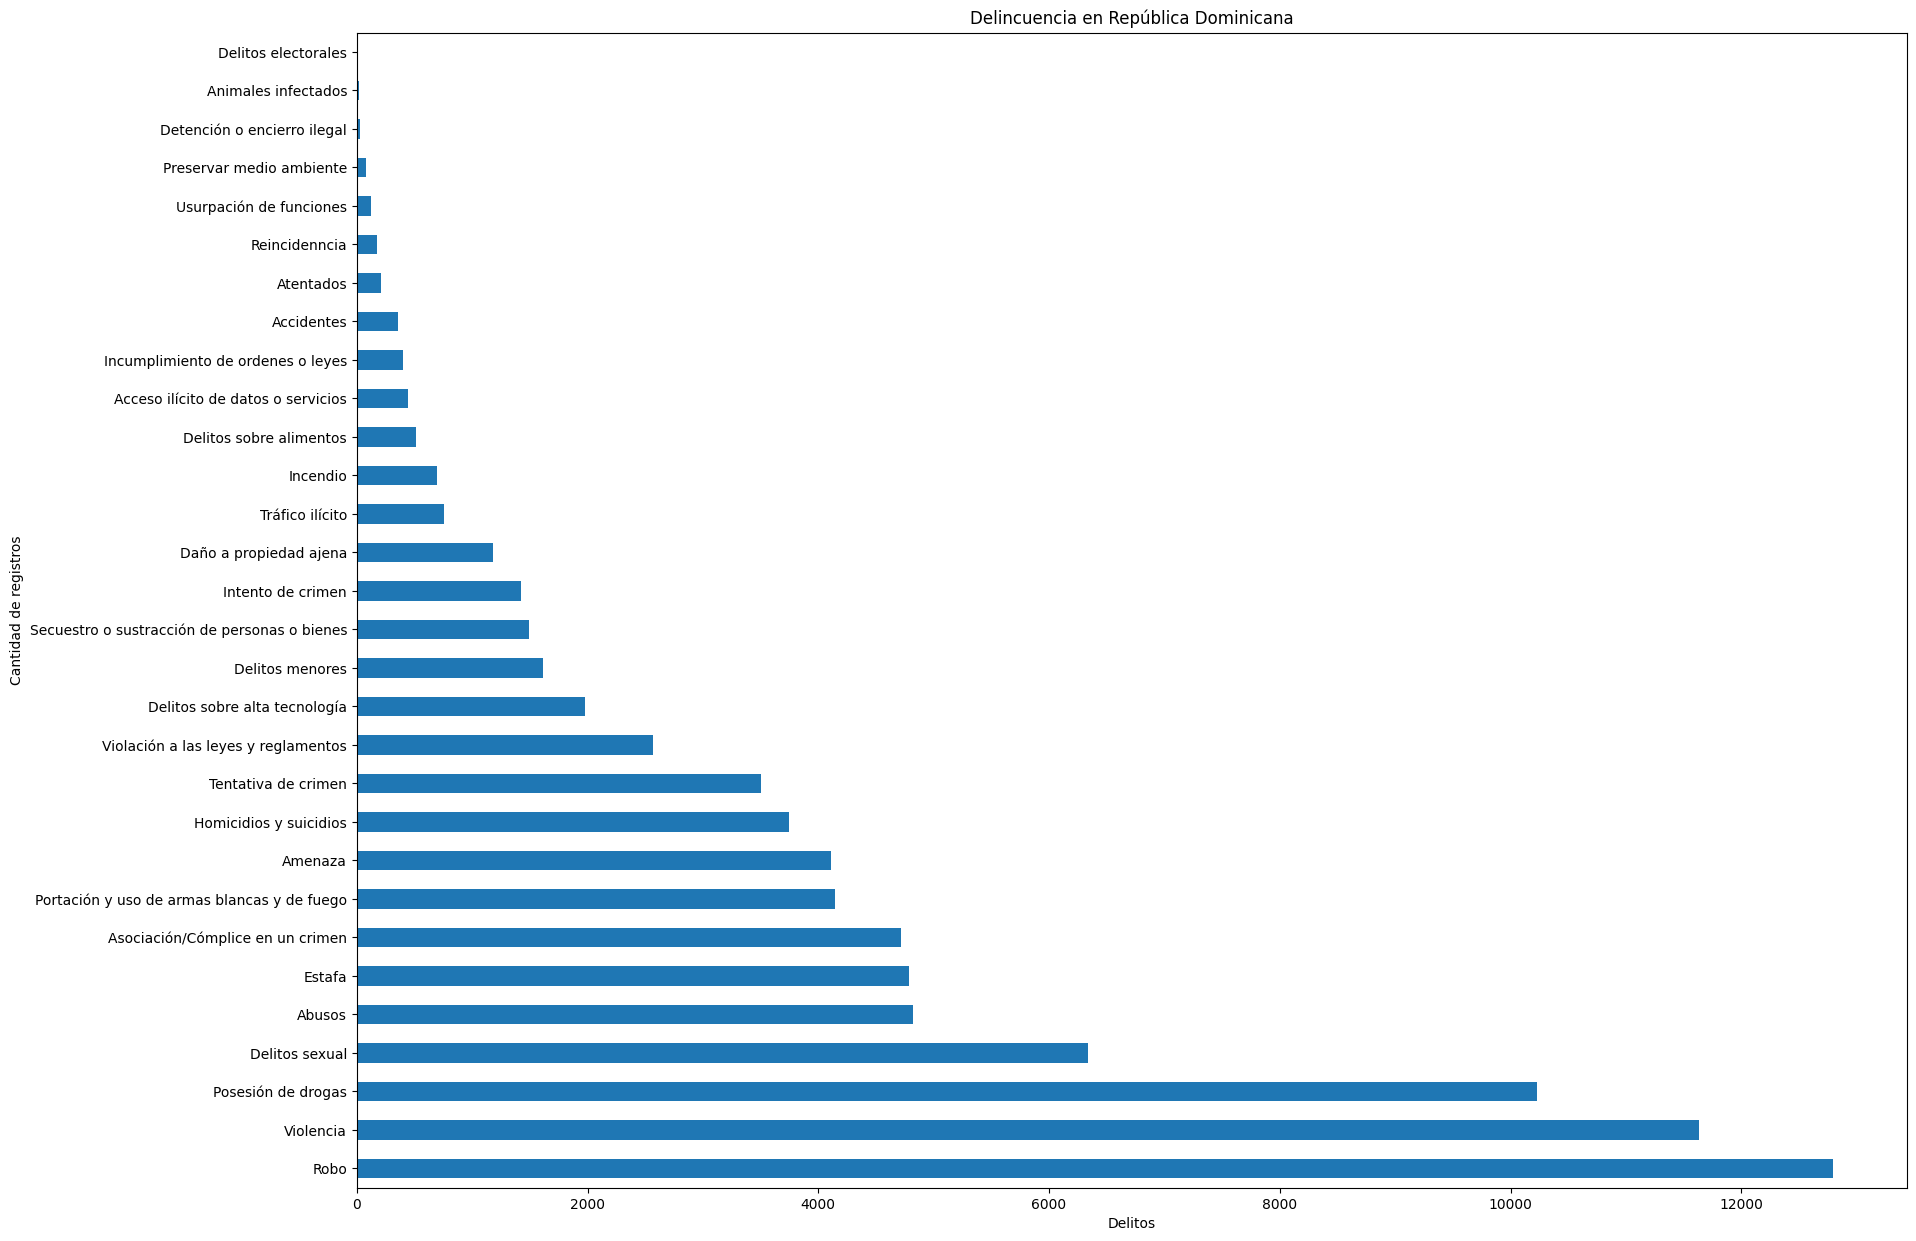

In [26]:
plt.figure(figsize = (20, 15))
df_grafico["Delito"].value_counts().plot(kind='barh')
# d
plt.title("Delincuencia en República Dominicana")
plt.xlabel("Delitos")
plt.ylabel("Cantidad de registros")
plt.show()

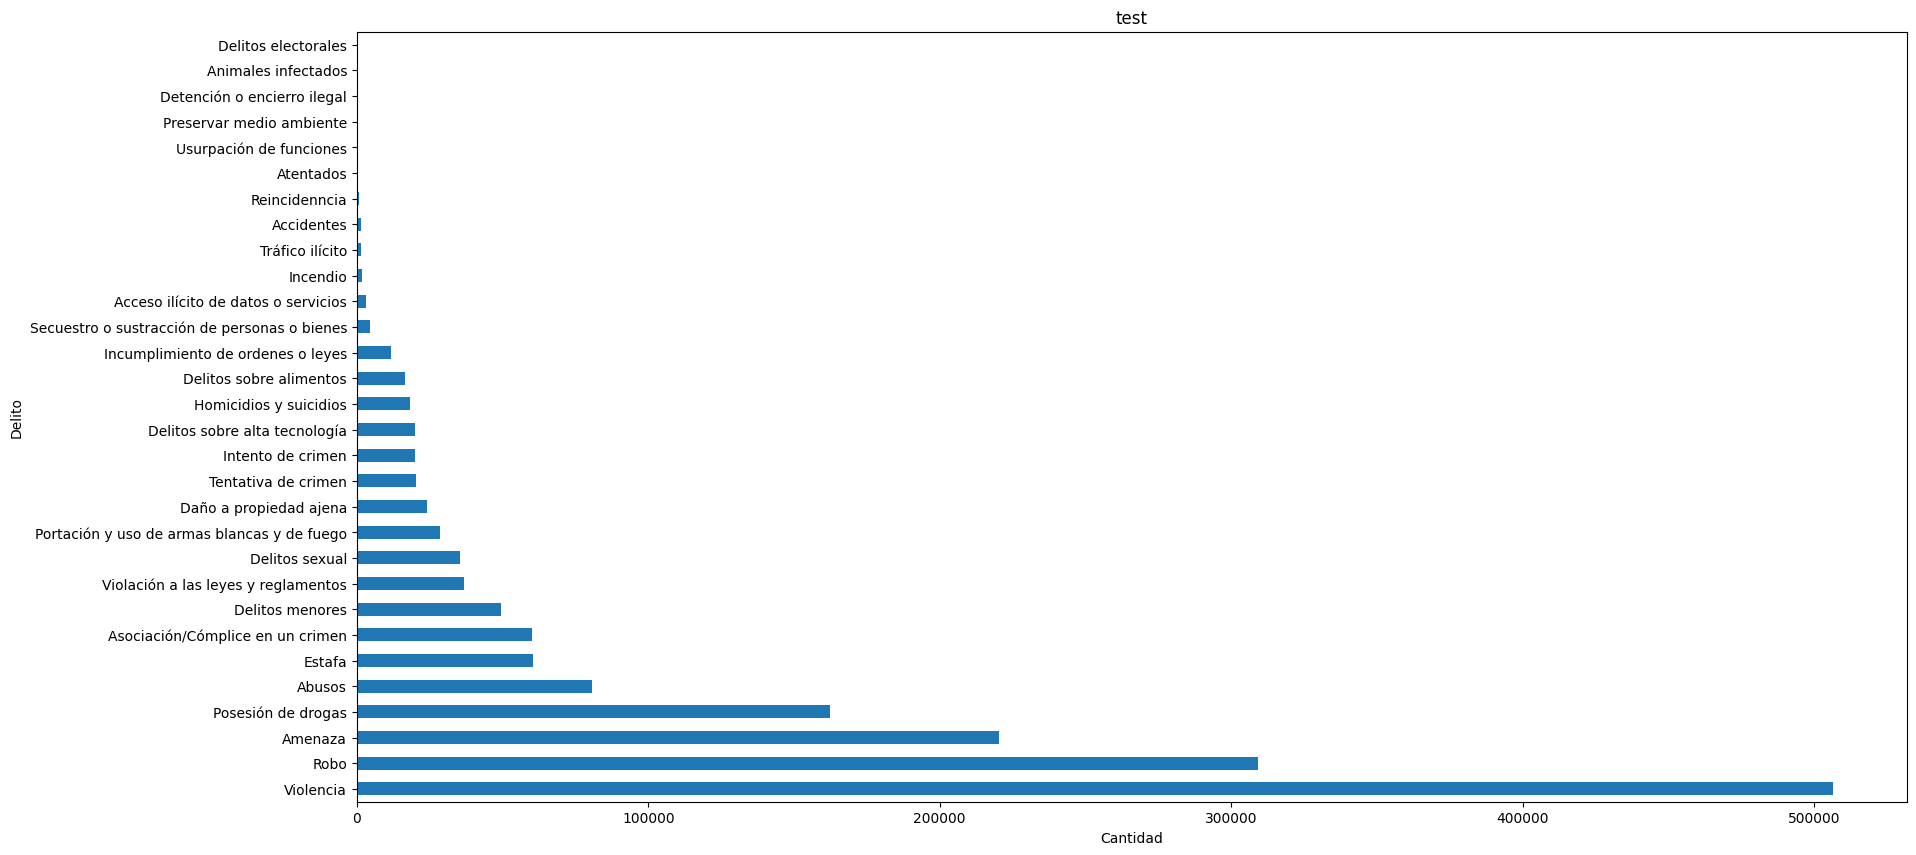

In [27]:
ajustesGraficos(df_grafico, "Delito", 0, (20, 10), 'barh', "test", 'Cantidad', 'Delito')

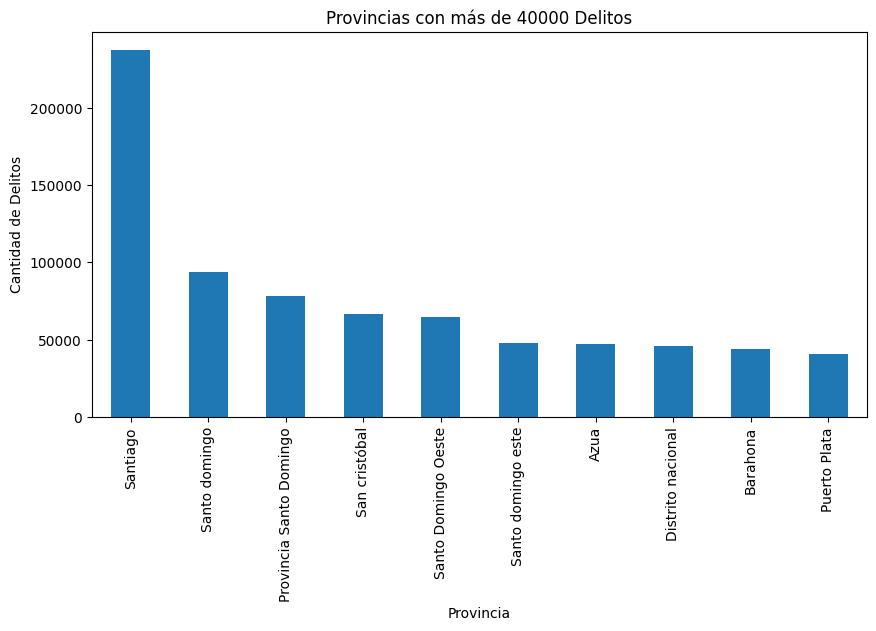

In [28]:
umbral_delitos = 40000 
titulo = f'Provincias con más de {umbral_delitos} Delitos'

ajustesGraficos(df_grafico, "Provincia", umbral_delitos, (10, 5), 'bar', titulo, 'Provincia', 'Cantidad de Delitos')

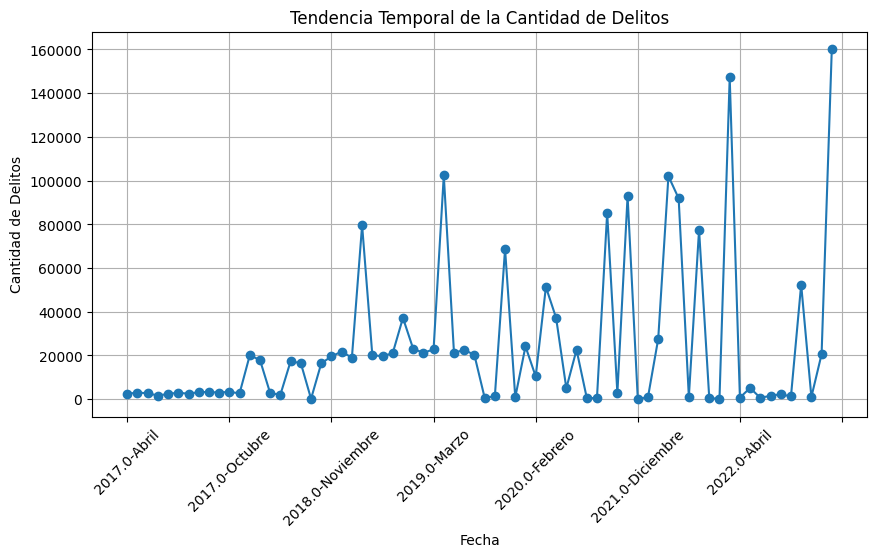

In [29]:
# Gráfico de líneas:
# Tendencia temporal de la cantidad de delitos
plt.figure(figsize=(10, 5))
df_grafico['Fecha'] = df_grafico['Año'].astype(str) + '-' + df_grafico['Mes']
df_grafico.groupby('Fecha')['Cantidad'].sum().plot(kind='line', marker='o')
plt.grid(True)
plt.title('Tendencia Temporal de la Cantidad de Delitos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)
plt.show()

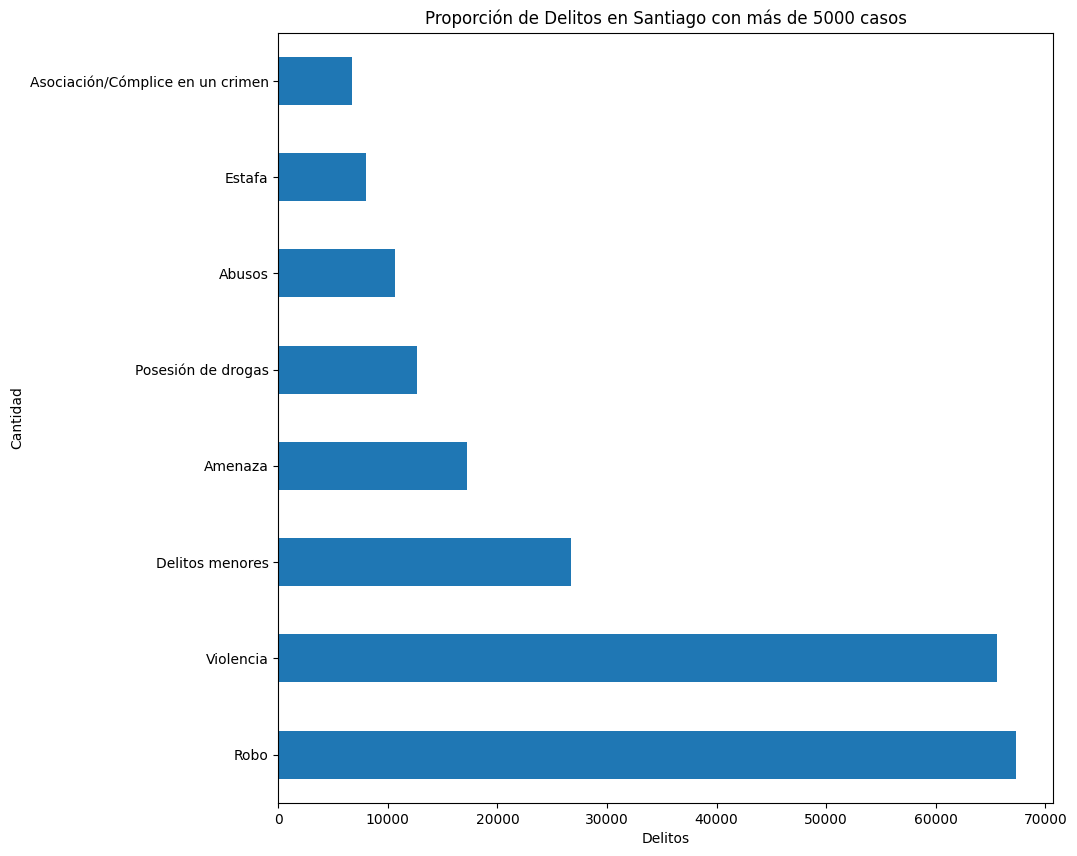

In [32]:
graficarDelitosProvincias(df_grafico, "Santiago", 5000, (10, 10), 'barh', "Delitos", "Cantidad")

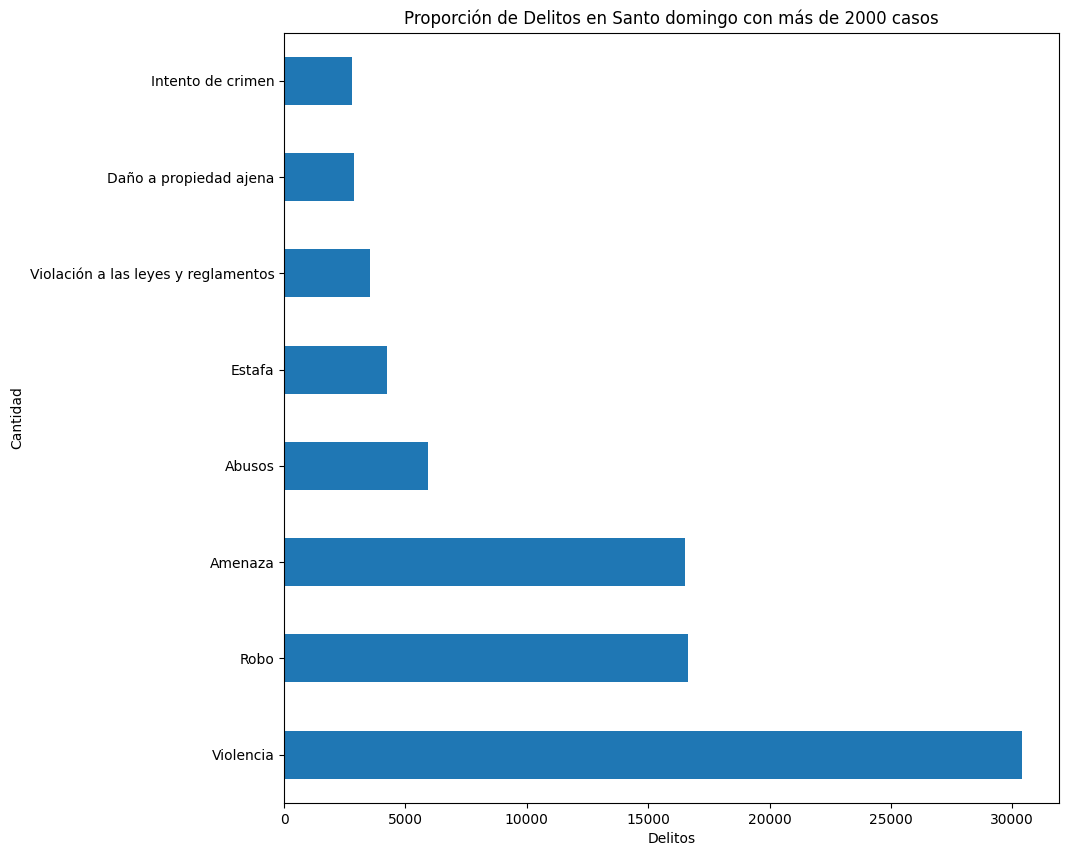

In [33]:
graficarDelitosProvincias(df_grafico, "Santo domingo", 2000, (10, 10), 'barh', "Delitos", "Cantidad")